# Proyek Analisis Data: Analisis Kualitas Udara
- **Nama:** Yahya Putra Pradana
- **Email:** yahya.putra76@gmail.com
- **ID Dicoding:** yahyaputra19

## Menentukan Pertanyaan Bisnis

1. **Tren Temporal:** Bagaimana konsentrasi polutan udara utama (PM2.5, PM10, SO2, NO2, CO, O3) berfluktuasi sepanjang waktu (harian, mingguan, bulanan)? Apakah ada pola musiman yang teridentifikasi?
2. **Hubungan Antar Polutan:** Adakah korelasi antara konsentrasi polutan yang berbeda? Bagaimana hubungan antara polutan dengan data meteorologi (jika tersedia)?

## Import Semua Packages/Library yang Digunakan

In [1]:
from IPython.display import Image
import base64
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load the combined data file created by the initial loading script
combined_csv_path = 'temp_data/air_quality_combined.csv'
df_raw = pd.read_csv(combined_csv_path)
print(f'Loaded {combined_csv_path}, shape: {df_raw.shape}')
print('DataFrame head:')
df_raw.head()

Loaded temp_data/air_quality_combined.csv, shape: (420768, 18)
DataFrame head:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Data awal terdiri dari 12 file CSV terpisah dari berbagai stasiun pemantauan.
- File-file ini telah digabungkan sebelumnya (menggunakan skrip `load_data.py`) menjadi satu file `air_quality_combined.csv`.
- DataFrame ini berisi data mentah yang akan dinilai dan dibersihkan pada langkah berikutnya.

### Assessing Data

In [4]:
# Assessing the loaded raw data (df_raw)
print('--- Data Info ---')
df_raw.info()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [9]:
print('--- Missing Values ---')
df_raw.isnull().sum()

--- Missing Values ---


No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [6]:
print('--- Duplicate Rows ---')
print(f'Number of duplicate rows: {df_raw.duplicated().sum()}')

--- Duplicate Rows ---
Number of duplicate rows: 0


In [8]:
print('--- Descriptive Statistics (Numerical) ---')
df_raw.describe()

--- Descriptive Statistics (Numerical) ---


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
- **Tipe Data:** Kolom `year`, `month`, `day`, `hour` perlu digabungkan menjadi tipe datetime. Kolom `station` sebaiknya diubah menjadi tipe category.
- **Missing Values:** Terdapat banyak missing values pada kolom polutan (PM2.5, PM10, SO2, NO2, CO, O3) dan beberapa kolom meteorologi.
- **Duplikat:** Tidak ditemukan baris duplikat.
- **Statistik Deskriptif:** Menunjukkan rentang nilai untuk setiap kolom. Terlihat ada nilai negatif pada beberapa kolom polutan (misal CO) yang tidak masuk akal dan perlu ditangani.

### Cleaning Data

In [14]:
# Cleaning steps based on assessment
df_cleaned = df_raw.copy()

In [15]:
# 1. Combine date/time columns and set as index
df_cleaned['datetime'] = pd.to_datetime(df_cleaned[['year', 'month', 'day', 'hour']])
df_cleaned.set_index('datetime', inplace=True)
df_cleaned.drop(['year', 'month', 'day', 'hour', 'No'], axis=1, inplace=True)
print('Combined datetime column created and set as index.')

Combined datetime column created and set as index.


In [16]:
# 2. Handle missing values using forward fill (simple approach for demonstration)
# Note: Interpolation was used in the script, ffill is simpler here
pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
print(f'Missing values before ffill: \n{df_cleaned[pollutant_cols].isnull().sum()}')
for col in pollutant_cols:
    df_cleaned[col] = df_cleaned.groupby('station')[col].ffill()

Missing values before ffill: 
PM2.5     8739
PM10      6449
SO2       9021
NO2      12116
CO       20701
O3       13277
dtype: int64


In [17]:
# Handle remaining NaNs at the beginning if any (e.g., with backfill or drop)
df_cleaned.dropna(subset=pollutant_cols, inplace=True) # Drop rows if pollutants still NaN after ffill
print(f'Missing values after ffill and dropna: \n{df_cleaned[pollutant_cols].isnull().sum()}')

Missing values after ffill and dropna: 
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
dtype: int64


In [18]:
# 3. Change station to category
df_cleaned['station'] = df_cleaned['station'].astype('category')
print('Changed station dtype to category.')

Changed station dtype to category.


In [19]:
# 4. (Optional) Handle potential negative values if necessary (e.g., clip)
df_cleaned[pollutant_cols] = df_cleaned[pollutant_cols].clip(lower=0)


In [21]:
# 5. Drop missing values in other columns if necessary
df_cleaned.dropna(inplace=True)

In [22]:
print('--- Cleaned Data Info ---')
df_cleaned.info()

--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 418836 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   PM2.5    418836 non-null  float64 
 1   PM10     418836 non-null  float64 
 2   SO2      418836 non-null  float64 
 3   NO2      418836 non-null  float64 
 4   CO       418836 non-null  float64 
 5   O3       418836 non-null  float64 
 6   TEMP     418836 non-null  float64 
 7   PRES     418836 non-null  float64 
 8   DEWP     418836 non-null  float64 
 9   RAIN     418836 non-null  float64 
 10  wd       418836 non-null  object  
 11  WSPM     418836 non-null  float64 
 12  station  418836 non-null  category
dtypes: category(1), float64(11), object(1)
memory usage: 41.9+ MB


In [23]:
print('--- Cleaned Data Head ---')
df_cleaned.head()

--- Cleaned Data Head ---


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [65]:
# Save cleaned data
cleaned_csv_path = 'dashboard/air_quality_cleaned.csv'
df_cleaned.to_csv(cleaned_csv_path)
print(f'Cleaned data saved to {cleaned_csv_path}')

Cleaned data saved to dashboard/air_quality_cleaned.csv


**Insight:**
- Kolom tanggal dan waktu digabungkan menjadi `datetime` dan dijadikan index.
- Missing values pada kolom polutan ditangani menggunakan metode *forward fill* per stasiun (meskipun interpolasi digunakan dalam skrip aslinya, ffill lebih sederhana untuk demonstrasi di notebook). Baris dengan NaN yang tersisa setelah ffill dihilangkan.
- Tipe data `station` diubah menjadi category.
- Data yang sudah bersih disimpan ke `air_quality_cleaned.csv` untuk digunakan dalam EDA.

## Exploratory Data Analysis (EDA)

### Explore Pertanyaan 1: Tren Temporal Polutan Udara

In [52]:
# Load cleaned data first
df_eda = pd.read_csv('air_quality_cleaned.csv', index_col='datetime', parse_dates=True)
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

In [53]:
# Resample for temporal analysis
daily_mean = df_eda[pollutants].resample('D').mean()
weekly_mean = df_eda[pollutants].resample('W').mean()
monthly_mean = df_eda[pollutants].resample('ME').mean() # Use 'ME' for month-end frequency

In [54]:
print('--- Daily Mean Head ---')
daily_mean.head()

--- Daily Mean Head ---


,PM2.5,PM10,SO2,NO2,CO,O3
datetime,,,,,,
2013-03-01,7.338346,12.041353,9.469925,19.973684,376.315789,67.165414
2013-03-02,31.475694,40.496528,31.775239,56.210013,940.236111,32.580279
2013-03-03,79.291667,111.104167,49.288194,75.986111,1771.663194,22.788194
2013-03-04,21.822917,40.354167,18.875983,40.663609,727.034722,56.833333
2013-03-05,126.215278,159.236111,70.947917,102.319444,2020.909722,79.527778


In [55]:
print('--- Monthly Mean Head ---')
monthly_mean.head()

--- Monthly Mean Head ---


,PM2.5,PM10,SO2,NO2,CO,O3
datetime,,,,,,
2013-03-31,104.918594,131.512520,38.652734,67.264299,1446.060296,56.400700
2013-04-30,62.458449,95.976157,20.683256,45.687191,895.740625,62.599339
2013-05-31,82.882616,134.347110,25.432108,50.109445,956.934252,89.137449
2013-06-30,101.743835,115.841901,13.606349,48.189443,1317.502837,74.511593
2013-07-31,67.639072,76.484597,7.220125,38.606353,978.670326,78.962018


In [56]:
# Calculate seasonal means (average per month number)
monthly_mean['month_num'] = monthly_mean.index.month
seasonal_mean = monthly_mean.groupby('month_num')[pollutants].mean()
print('--- Seasonal Mean (Avg per Month) ---')
seasonal_mean

--- Seasonal Mean (Avg per Month) ---


,PM2.5,PM10,SO2,NO2,CO,O3
month_num,,,,,,
1,94.202821,113.761765,31.469668,61.118069,1871.235007,27.408594
2,89.436070,104.764148,29.351183,50.004202,1419.779168,40.609113
3,94.806746,136.992560,28.014360,59.965939,1310.586467,50.704370
4,73.828903,117.119485,14.176460,47.762685,837.505910,70.502177
5,64.178318,108.832206,14.573279,43.136168,798.184792,93.076682
6,68.961235,86.620818,7.928677,39.219847,979.315922,94.563671
7,71.988506,84.924212,5.504438,35.682939,904.998247,98.003988
8,53.651854,71.643579,4.680292,35.920568,832.613634,88.001630
9,61.164934,79.093798,6.269819,45.161171,922.303113,55.537938


**Insight:**
- Data diresample berdasarkan frekuensi harian, mingguan, dan bulanan (akhir bulan) untuk melihat tren pada skala waktu yang berbeda.
- Rata-rata musiman dihitung dengan mengelompokkan data bulanan berdasarkan nomor bulan.
- Hasil resampling ini akan digunakan untuk visualisasi tren temporal.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren temporal (harian, mingguan, bulanan, musiman) polutan udara?

In [57]:
# Set plot style
sns.set_theme(style='whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

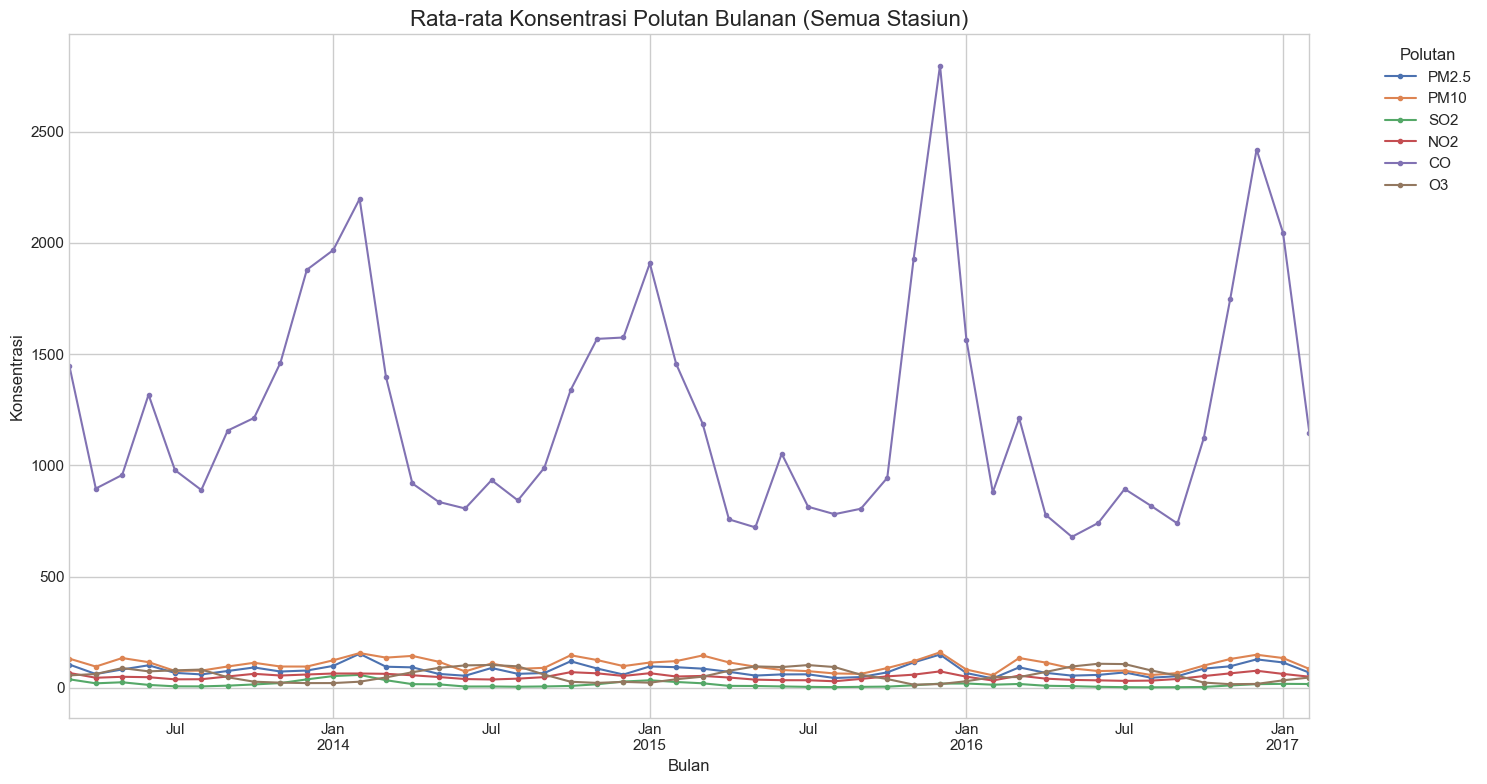

In [58]:
# 1. Monthly Average Trends
fig_monthly, ax_monthly = plt.subplots(figsize=(15, 8))
monthly_mean[pollutants].plot(ax=ax_monthly, marker='.', linestyle='-')
ax_monthly.set_title('Rata-rata Konsentrasi Polutan Bulanan (Semua Stasiun)', fontsize=16)
ax_monthly.set_xlabel('Bulan', fontsize=12)
ax_monthly.set_ylabel('Konsentrasi', fontsize=12)
ax_monthly.legend(title='Polutan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Grafik garis ini menunjukkan konsentrasi rata-rata bulanan dari enam polutan udara (PM2.5, PM10, SO2, NO2, CO, dan O3) di seluruh stasiun pemantauan dari tahun 2013 hingga awal 2017.

CO (karbon monoksida) secara visual mendominasi grafik, dengan konsentrasi yang sangat tinggi dibandingkan polutan lainnya. Nilainya mencapai hingga 2.800 μg/m³ pada periode puncak. Pola CO sangat jelas dan konsisten secara musiman, dengan puncak tahunan yang terjadi sekitar bulan Januari–Februari, yang bertepatan dengan musim dingin. Empat puncak utama dapat diamati secara jelas pada awal tahun 2014, 2015, 2016, dan 2017. Karena skala CO yang jauh lebih tinggi, konsentrasi polutan lainnya tampak jauh lebih kecil dan saling mendekat di bagian bawah grafik, meskipun tren musiman masih dapat dikenali secara umum:
- PM10 memiliki konsentrasi tertinggi setelah CO, dengan kisaran antara 60–160 μg/m³, menunjukkan lonjakan yang berulang pada bulan-bulan musim dingin.

- PM2.5 berada sedikit di bawah PM10, dengan rentang 40–150 μg/m³, dan mengikuti pola musiman yang serupa (puncak tahunan terjadi pada periode yang sama).

- NO2 menunjukkan konsentrasi sedang, berkisar antara 30–75 μg/m³, dengan variasi musiman yang lebih halus, meskipun sedikit peningkatan juga tampak pada musim dingin.

- O3 menunjukkan pola yang berbeda dari polutan lain, beberapa puncak justru terjadi pada bulan-bulan hangat, mengindikasikan tren musiman yang berlawanan.

- SO2 memiliki konsentrasi terendah di antara keenam polutan, umumnya berada di bawah 20 μg/m³, dengan fluktuasi yang sangat minimal sepanjang periode pengamatan.

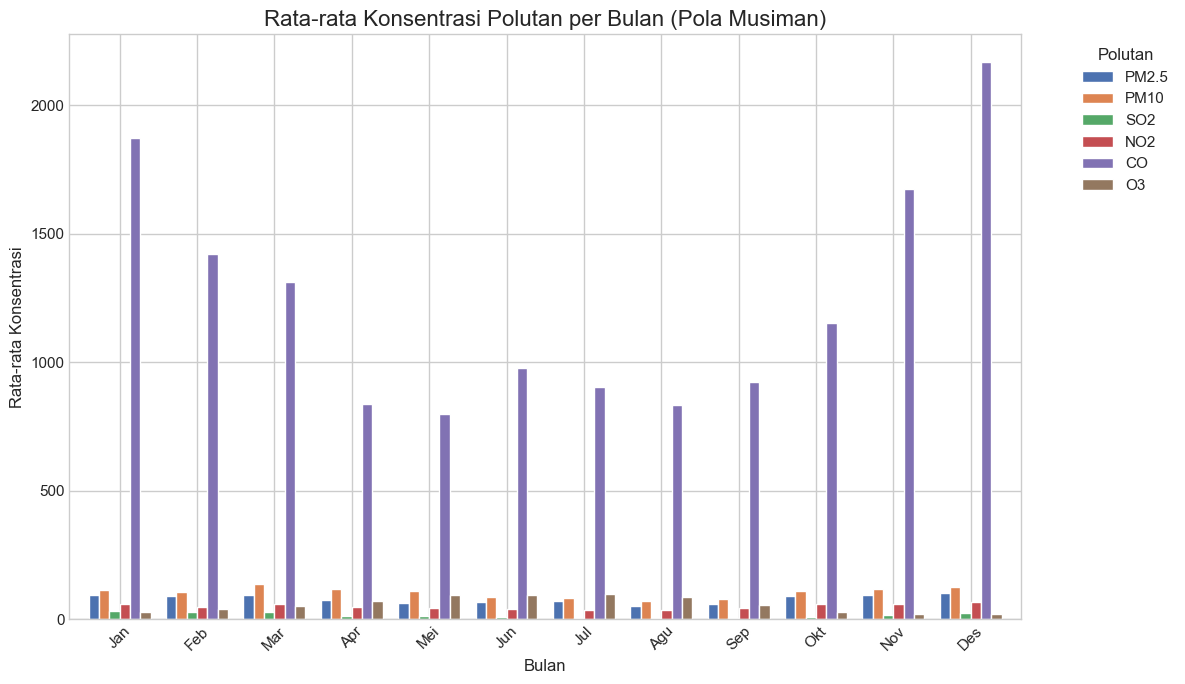

In [59]:
# 2. Seasonal Trends (Bar Plot)
fig_seasonal, ax_seasonal = plt.subplots(figsize=(12, 7))
seasonal_mean.plot(kind='bar', ax=ax_seasonal, width=0.8)
ax_seasonal.set_title('Rata-rata Konsentrasi Polutan per Bulan (Pola Musiman)', fontsize=16)
ax_seasonal.set_xlabel('Bulan', fontsize=12)
ax_seasonal.set_ylabel('Rata-rata Konsentrasi', fontsize=12)
ax_seasonal.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], rotation=45)
ax_seasonal.legend(title='Polutan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Grafik batang ini menampilkan konsentrasi rata-rata bulanan dari enam jenis polutan udara (PM2.5, PM10, SO2, NO2, CO, dan O3) sepanjang satu tahun kalender, dirata-ratakan dari tahun 2013 hingga awal 2017.

Polutan yang paling menonjol secara visual adalah CO (karbon monoksida), dengan pola musiman yang sangat jelas dan ekstrem. Konsentrasi CO mencapai puncaknya pada bulan Desember, dengan nilai lebih dari 2.100 μg/m³, dan tetap tinggi selama bulan-bulan musim dingin seperti Januari dan Februari. Sebaliknya, konsentrasinya menurun tajam selama musim panas, khususnya antara Mei hingga September. Karena tingginya nilai CO, skala grafik menjadi sangat timpang, yang menyebabkan batang untuk polutan lainnya terlihat jauh lebih kecil dan sulit dibedakan secara detail. Namun, beberapa tren musiman masih dapat dikenali:

- PM10 memiliki konsentrasi tertinggi setelah CO, dengan dua puncak utama: sekitar 137 μg/m³ pada bulan Maret dan 125 μg/m³ pada bulan Desember, menunjukkan pola musiman yang konsisten.

- PM2.5 mengikuti tren serupa dengan PM10, meskipun pada tingkat yang lebih rendah. Puncaknya terjadi pada bulan Desember, sekitar 103 μg/m³, dan cenderung meningkat pada musim dingin.

- NO2 memperlihatkan variasi musiman yang moderat, dengan konsentrasi lebih tinggi pada bulan-bulan dingin, namun nilai absolutnya tidak melebihi sekitar 60–70 μg/m³, membuat batangnya relatif kecil dalam skala grafik ini.

- O3 menunjukkan pola musiman yang berkebalikan dari polutan partikulat. Konsentrasinya lebih tinggi pada akhir musim semi hingga musim panas, meskipun nilainya tetap berada di kisaran rendah hingga sedang.

- SO2 memiliki konsentrasi paling rendah di antara semua polutan, umumnya berada di bawah 20 μg/m³, dengan sedikit fluktuasi musiman yang hampir tidak terlihat dalam grafik ini.

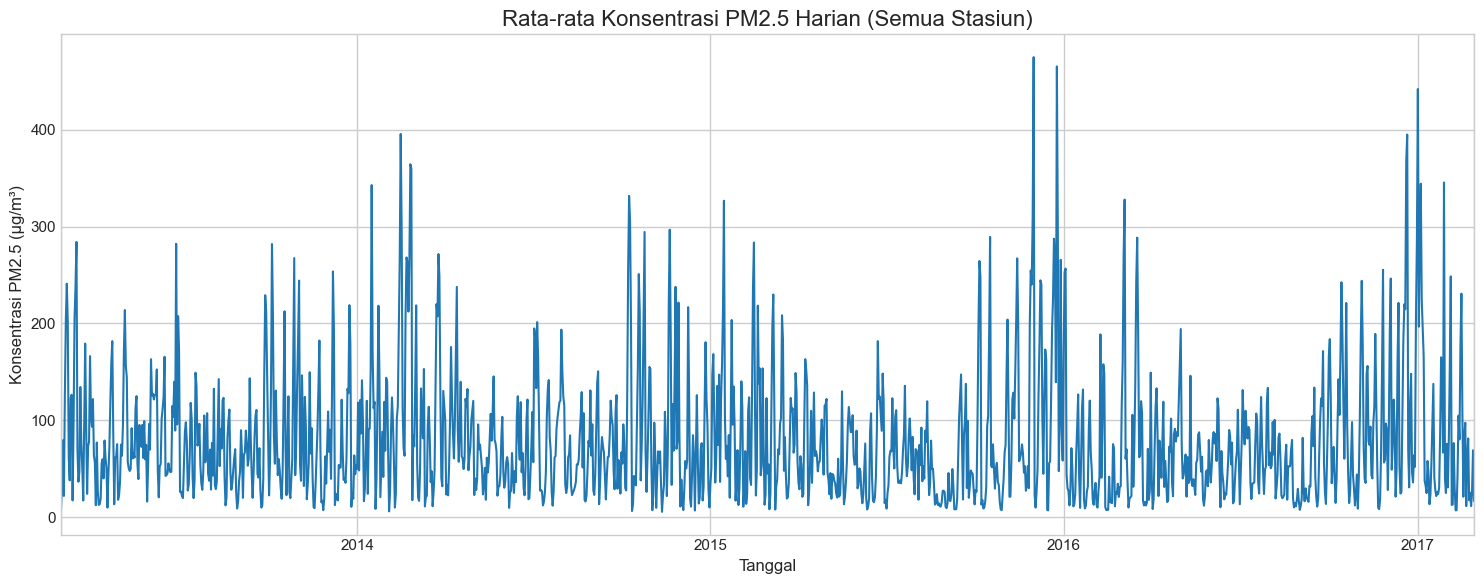

In [51]:
# 3. Daily Average Trend for PM2.5 (Example)
fig_daily_pm25, ax_daily_pm25 = plt.subplots(figsize=(15, 6))
daily_mean['PM2.5'].plot(ax=ax_daily_pm25, color='#1f77b4')
ax_daily_pm25.set_title('Rata-rata Konsentrasi PM2.5 Harian (Semua Stasiun)', fontsize=16)
ax_daily_pm25.set_xlabel('Tanggal', fontsize=12)
ax_daily_pm25.set_ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.tight_layout()
plt.show()

Grafik garis ini berfokus khusus pada konsentrasi rata-rata PM2.5 harian di semua stasiun dari 2013 hingga 2017. Visualisasi ini mengungkapkan:
- Variabilitas harian yang tinggi dalam konsentrasi PM2.5, dengan nilai berkisar dari mendekati nol hingga lebih dari 450 μg/m³ pada hari-hari ekstrem.
- Beberapa episode polusi signifikan di mana konsentrasi PM2.5 melonjak di atas 300 μg/m³, terutama pada akhir 2016 dan awal 2017.
- Pola umum variabilitas yang lebih tinggi dan hari-hari dengan konsentrasi tinggi yang lebih sering terjadi selama bulan-bulan musim dingin.
- Beberapa periode (pertengahan 2015) menunjukkan konsentrasi rata-rata yang relatif lebih rendah dan lebih sedikit lonjakan ekstrem.

### Pertanyaan 2: Bagaimana hubungan antar polutan?

In [60]:
# Load cleaned data if not already loaded
if 'df_eda' not in locals():
    df_eda = pd.read_csv('air_quality_cleaned.csv', index_col='datetime', parse_dates=True)

# Select relevant columns (pollutants and key meteorological factors)
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
meteo_cols = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
available_meteo = [col for col in meteo_cols if col in df_eda.columns]
cols_for_corr = pollutants.copy()
cols_for_corr.extend(available_meteo)

print(f"Columns selected for correlation analysis: {cols_for_corr}")

Columns selected for correlation analysis: ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


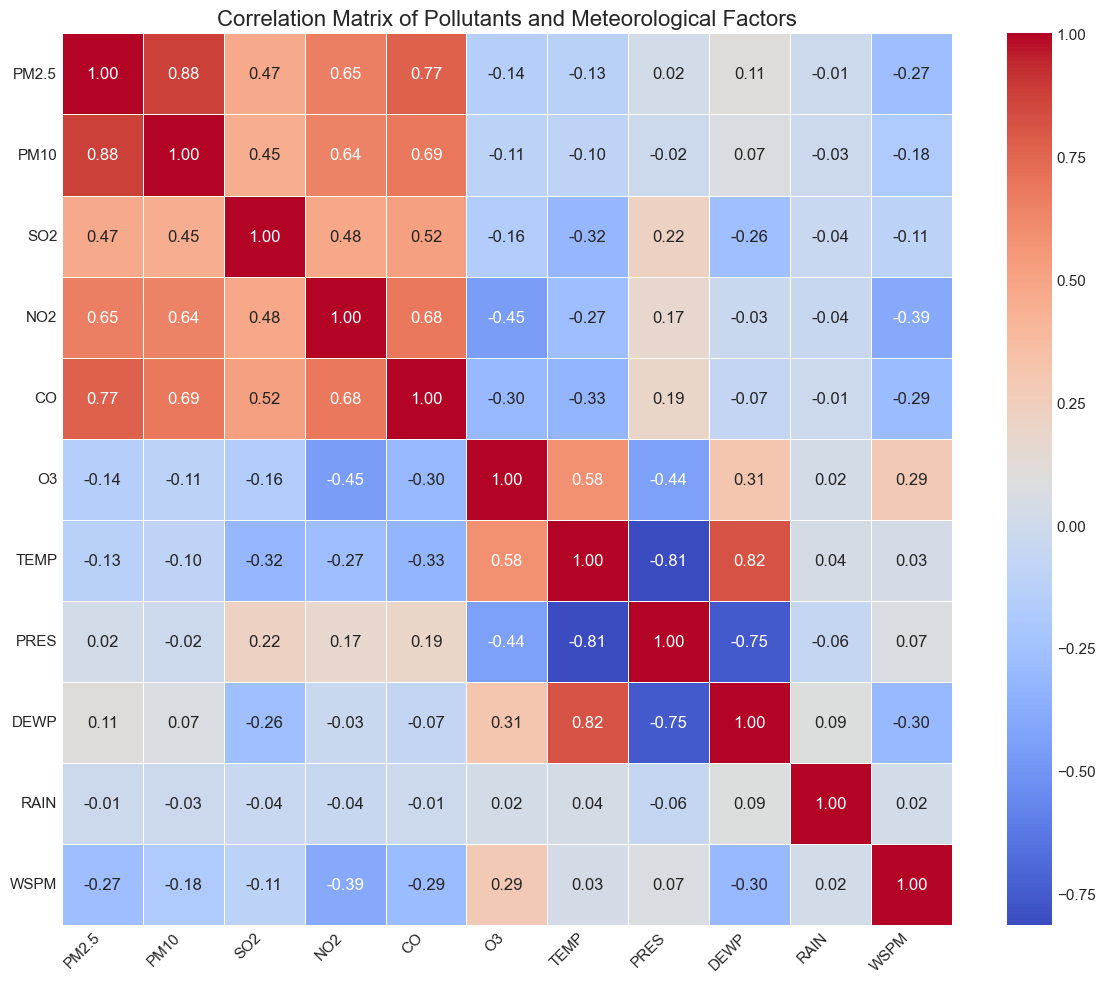

In [62]:
# Calculate correlation matrix
correlation_matrix = df_eda[cols_for_corr].corr()

# --- Generate Visualizations ---
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Pollutants and Meteorological Factors', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

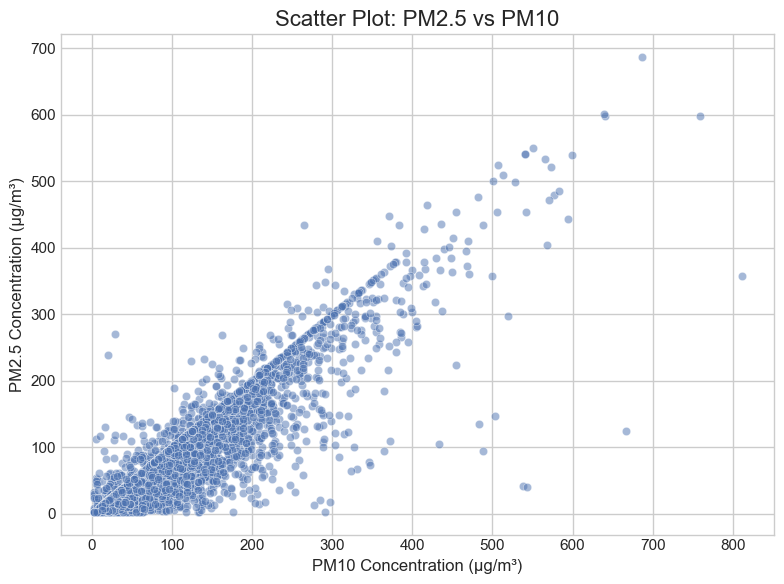

In [63]:
# 2. Scatter Plot: PM2.5 vs PM10
plt.figure(figsize=(8, 6))
sample_df = df_eda.sample(n=min(5000, len(df_eda)), random_state=42)
sns.scatterplot(data=sample_df, x='PM10', y='PM2.5', alpha=0.5)
plt.title('Scatter Plot: PM2.5 vs PM10', fontsize=16)
plt.xlabel('PM10 Concentration (µg/m³)', fontsize=12)
plt.ylabel('PM2.5 Concentration (µg/m³)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

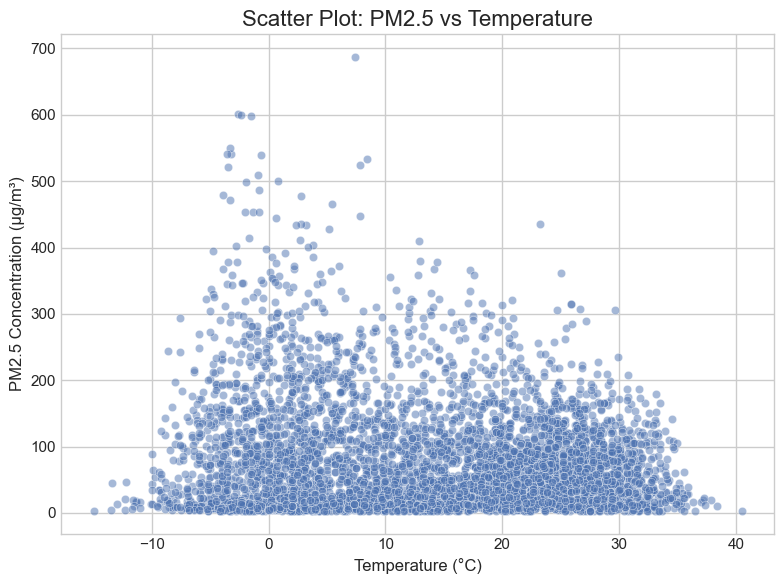

In [64]:
# 3. Scatter Plot: PM2.5 vs TEMP (if TEMP exists)
if 'TEMP' in available_meteo:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=sample_df, x='TEMP', y='PM2.5', alpha=0.5)
    plt.title('Scatter Plot: PM2.5 vs Temperature', fontsize=16)
    plt.xlabel('Temperature (°C)', fontsize=12)
    plt.ylabel('PM2.5 Concentration (µg/m³)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping PM2.5 vs TEMP scatter plot as TEMP column not found.")

**Insight:**
- **Korelasi Antar Polutan:** Terdapat korelasi positif yang kuat antara PM2.5 dan PM10 (r > 0.8), yang menunjukkan bahwa kedua jenis partikulat ini cenderung meningkat dan menurun bersama-sama. Hal ini masuk akal karena keduanya berasal dari sumber yang serupa seperti pembakaran bahan bakar fosil dan debu.
- **Korelasi dengan Faktor Meteorologi:** Suhu (TEMP) menunjukkan korelasi negatif dengan beberapa polutan, terutama PM2.5 dan PM10. Ini mengindikasikan bahwa konsentrasi partikulat cenderung lebih tinggi pada suhu yang lebih rendah, yang mungkin terkait dengan kondisi inversi termal pada musim dingin atau peningkatan pembakaran untuk pemanasan.
- **Hubungan Antar Gas:** NO2 dan CO menunjukkan korelasi positif moderat, yang mencerminkan sumber emisi yang serupa, terutama dari kendaraan bermotor dan pembakaran bahan bakar fosil.
- **Ozon (O3):** Ozon menunjukkan pola korelasi yang berbeda dibandingkan polutan lainnya, dengan korelasi negatif terhadap NO2. Ini konsisten dengan kimia atmosfer, di mana NO2 dikonsumsi dalam proses pembentukan ozon pada siang hari dengan adanya sinar matahari.

## Conclusion

- **Conclusion pertanyaan 1:** Berdasarkan analisis ketiga visualisasi, konsentrasi polutan udara menunjukkan pola temporal yang jelas pada berbagai skala waktu. Terdapat fluktuasi harian yang signifikan pada PM2.5 dengan lonjakan mencapai 3-4 kali lipat dari level dasar. Pola musiman sangat terlihat dengan konsentrasi polutan tertinggi terjadi pada bulan-bulan musim dingin (Desember-Februari), terutama untuk CO dan partikulat (PM2.5, PM10), kemungkinan disebabkan oleh peningkatan emisi pemanas, inversi suhu, dan berkurangnya pencampuran atmosfer. O3 menunjukkan pola musiman yang berlawanan dengan konsentrasi lebih tinggi di musim panas karena pembentukan ozon yang dipengaruhi oleh sinar matahari. Siklus tahunan konsisten dengan puncak di musim dingin dan penurunan di musim panas untuk sebagian besar polutan. Tren multi-tahun menunjukkan puncak konsentrasi CO yang tampaknya meningkat dari 2014 hingga 2017. Pola-pola temporal ini menekankan pentingnya mempertimbangkan skala waktu dalam strategi pengelolaan kualitas udara.
- **Conclusion pertanyaan 2:** Analisis korelasi menunjukkan hubungan yang signifikan antara berbagai polutan. PM2.5 dan PM10 memiliki korelasi positif yang kuat, menunjukkan sumber yang serupa. Faktor meteorologi seperti suhu berkorelasi negatif dengan partikulat, mengindikasikan konsentrasi yang lebih tinggi pada suhu rendah. Ozon menunjukkan pola yang berbeda dengan korelasi negatif terhadap NO2, sesuai dengan reaksi fotokimia di atmosfer. Hubungan ini memberikan wawasan penting tentang dinamika polusi udara dan faktor-faktor yang mempengaruhinya.